<a href="https://colab.research.google.com/github/Bakhitarose/AI-Coursework-2025/blob/main/Netflix_Titles_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the dataset and check the first 5 rows:

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)

import numpy as np
import pandas as pd

df = pd.read_csv(path + '/netflix_titles.csv')
df.head(5)

Using Colab cache for faster access to the 'netflix-shows' dataset.
Path to dataset files: /kaggle/input/netflix-shows


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Question 1: How many rows and columns are contained in the dataset?

In [ ]:
print(f"The number of rows and columns is: {df.shape}") # Number of rows and columns as a tuple.

The number of rows and columns is: (8807, 12)


Question 2: What datatypes are contained in the dataset?

In [ ]:
print(f"The column datatypes in the dataset are: \n{df.dtypes}")


The column datatypes in the dataset are: 
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


Question 3: Is the dataset complete? i.e no missing values?

In [ ]:
is_complete = df.isnull().sum().sum()== 0

if is_complete:
  print("The dataset is COMPLETE, no missing values!")
else:
  total_missing = df.isnull().sum().sum()
  print(f"The dataset is INCOMPLETE. The number of missing values is {total_missing}")

The dataset is INCOMPLETE. The number of missing values is 4307


Question 4: List the number of Movies and TV Shows among the last 20 rows of the dataset.

In [ ]:
last_20_rows = df.tail(20)

print("LIST OF THE LAST 20 MOVIES AND SERIES: ")
for index, row in last_20_rows.iterrows():
  print(f"{index}. [{row['type']}] - {row['title']}")


LIST OF THE LAST 20 MOVIES AND SERIES: 
8787. [Movie] - You Can’t Fight Christmas
8788. [Movie] - You Carry Me
8789. [Movie] - You Changed My Life
8790. [Movie] - You Don't Mess with the Zohan
8791. [Movie] - Young Adult
8792. [Movie] - Young Tiger
8793. [Movie] - Yours, Mine and Ours
8794. [Movie] - اشتباك
8795. [TV Show] - Yu-Gi-Oh! Arc-V
8796. [TV Show] - Yunus Emre
8797. [TV Show] - Zak Storm
8798. [Movie] - Zed Plus
8799. [Movie] - Zenda
8800. [TV Show] - Zindagi Gulzar Hai
8801. [Movie] - Zinzana
8802. [Movie] - Zodiac
8803. [TV Show] - Zombie Dumb
8804. [Movie] - Zombieland
8805. [Movie] - Zoom
8806. [Movie] - Zubaan


Question 5:Give the number of all Movies originating from South Africa


In [ ]:
sa_movies = df[(df['type'] == 'Movie') & (df['country'].notna()) & (df['country'].str.contains('South Africa'))]


num_sa_movies = sa_movies.shape[0]
print("Number of Movies originating from South Africa:", num_sa_movies)

Number of Movies originating from South Africa: 51


Questoin 6:What is the description of the movie in the 12th row?


In [ ]:
description_12th = df.iloc[11]['description']
print("Description of the movie in the 12th row:", description_12th)


Description of the movie in the 12th row: Struggling to earn a living in Bangkok, a man joins an emergency rescue service and realizes he must unravel a citywide conspiracy.


Question 7:From these South African movies, list only those released in 2021

In [ ]:
sa_movies_2021 = df[
    (df['type'] == 'Movie') &
    (df['country'].notna()) &
    (df['country'].str.contains('South Africa')) &
    (df['release_year'] == 2021)
]

# Display the titles
print("South African Movies released in 2021:")
print(sa_movies_2021['title'].to_list())


South African Movies released in 2021:
['Slay', "Trippin' with the Kandasamys", 'I Am All Girls', 'Loyiso Gola: Unlearning']


Question 8:List the entire cast of all movies released in 2021.


In [ ]:

movies_2021 = df[(df['type'] == 'Movie') & (df['release_year'] == 2021)]
casts_2021 = movies_2021['cast'].dropna()
for idx, row in movies_2021.dropna(subset=['cast']).iterrows():
    print(f"Title: {row['title']}")
    print(f"Cast: {row['cast']}\n")


Title: My Little Pony: A New Generation
Cast: Vanessa Hudgens, Kimiko Glenn, James Marsden, Sofia Carson, Liza Koshy, Ken Jeong, Elizabeth Perkins, Jane Krakowski, Michael McKean, Phil LaMarr

Title: The Starling
Cast: Melissa McCarthy, Chris O'Dowd, Kevin Kline, Timothy Olyphant, Daveed Diggs, Skyler Gisondo, Laura Harrier, Rosalind Chao, Kimberly Quinn, Loretta Devine, Ravi Kapoor

Title: Je Suis Karl
Cast: Luna Wedler, Jannis Niewöhner, Milan Peschel, Edin Hasanović, Anna Fialová, Marlon Boess, Victor Boccard, Fleur Geffrier, Aziz Dyab, Mélanie Fouché, Elizaveta Maximová

Title: Confessions of an Invisible Girl
Cast: Klara Castanho, Lucca Picon, Júlia Gomes, Marcus Bessa, Kiria Malheiros, Fernanda Concon, Gabriel Lima, Caio Cabral, Leonardo Cidade, Jade Cardozo

Title: Intrusion
Cast: Freida Pinto, Logan Marshall-Green, Robert John Burke, Megan Elisabeth Kelly, Sarah Minnich, Hayes Hargrove, Mark Sivertsen, Brandon Fierro, Antonio Valles, Clint Obenchain

Title: Go! Go! Cory Carson:

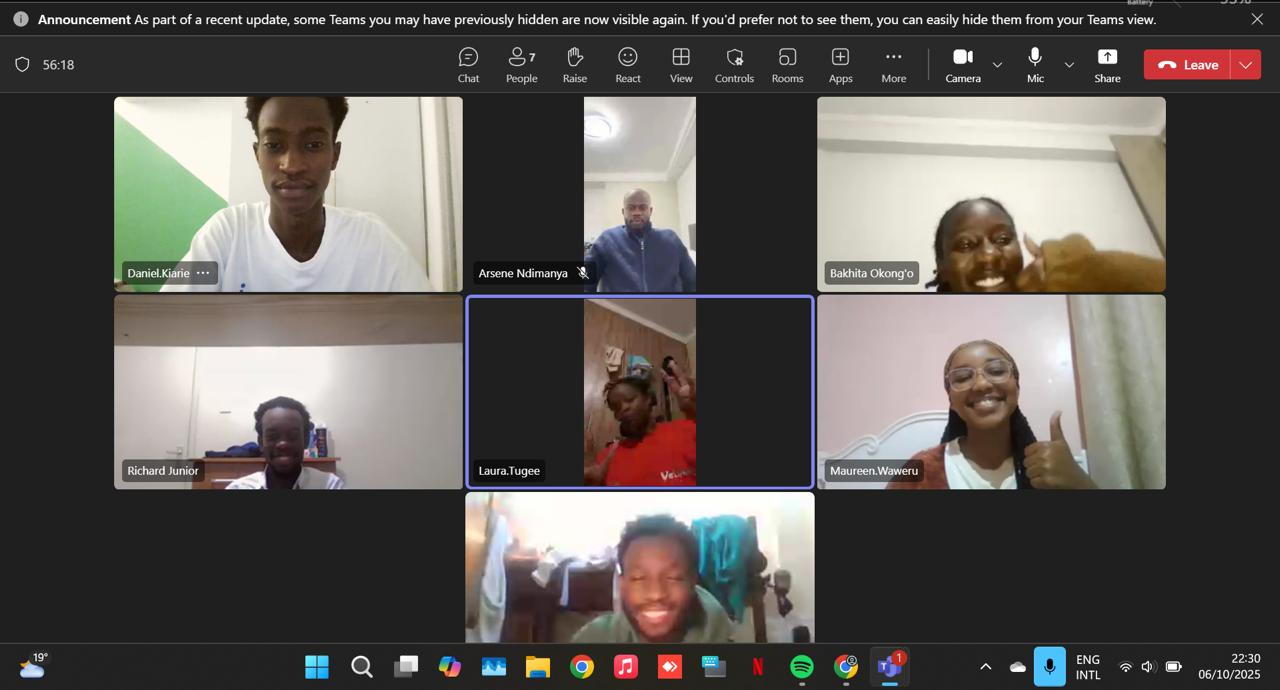